### Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Rahmat Hidayat
- Email: amathmrs02@gmail.com
- Id Dicoding: rahmathidyatt

### Pertanyaan Bisnis
- Bagaimana demografi pelanggan dalam penjualan ?
- Jenis pembayaran apa yang banyak digunakan saat pembayaran ?

### Library yang Dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Wrangling

#### Gathering Data

In [4]:
customers_dataset = pd.read_csv(r"C:\xampp\htdocs\ecommerce\dataset\customers_dataset.csv")
customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
geolocation_dataset = pd.read_csv(r"C:\xampp\htdocs\ecommerce\dataset\geolocation_dataset.csv")
geolocation_dataset.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
order_items_dataset = pd.read_csv(r"C:\xampp\htdocs\ecommerce\dataset\order_items_dataset.csv")
order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
order_payments_dataset = pd.read_csv(r"C:\xampp\htdocs\ecommerce\dataset\order_payments_dataset.csv")
order_payments_dataset.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
order_reviews_dataset = pd.read_csv(r"C:\xampp\htdocs\ecommerce\dataset\order_reviews_dataset.csv")
order_reviews_dataset.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
orders_dataset = pd.read_csv(r"C:\xampp\htdocs\ecommerce\dataset\orders_dataset.csv")
orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
product_category_name_translation = pd.read_csv(r"C:\xampp\htdocs\ecommerce\dataset\product_category_name_translation.csv")
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [12]:
products_dataset = pd.read_csv(r"C:\xampp\htdocs\ecommerce\dataset\products_dataset.csv")
products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [13]:
sellers_dataset = pd.read_csv(r"C:\xampp\htdocs\ecommerce\dataset\sellers_dataset.csv")
sellers_dataset.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#### Assessing Data

In [14]:
customers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [15]:
print("Jumlah duplikasi: ", customers_dataset.duplicated().sum())

Jumlah duplikasi:  0


In [16]:
customers_dataset.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [17]:
geolocation_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [18]:
print("Jumlah duplikasi: ", geolocation_dataset.duplicated().sum())

Jumlah duplikasi:  261831


In [19]:
geolocation_dataset.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [20]:
order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [21]:
print("Jumlah duplikasi: ", order_items_dataset.duplicated().sum())

Jumlah duplikasi:  0


In [22]:
order_items_dataset.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [23]:
order_payments_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [24]:
print("Jumlah duplikasi: ", order_payments_dataset.duplicated().sum())

Jumlah duplikasi:  0


In [25]:
order_payments_dataset.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [26]:
order_reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [27]:
order_reviews_dataset.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [28]:
print("Jumlah duplikasi: ", order_reviews_dataset.duplicated().sum())

Jumlah duplikasi:  0


In [29]:
order_reviews_dataset.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [30]:
orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [31]:
orders_dataset.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [32]:
print("Jumlah duplikasi: ", orders_dataset.duplicated().sum())

Jumlah duplikasi:  0


In [33]:
orders_dataset.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [34]:
product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [35]:
print("Jumlah duplikasi: ", product_category_name_translation.duplicated().sum())

Jumlah duplikasi:  0


In [36]:
product_category_name_translation.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [37]:
products_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [38]:
products_dataset.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [39]:
print("Jumlah duplikasi: ", products_dataset.duplicated().sum())

Jumlah duplikasi:  0


In [40]:
products_dataset.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [41]:
sellers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [42]:
print("Jumlah duplikasi: ", sellers_dataset.duplicated().sum())

Jumlah duplikasi:  0


In [43]:
sellers_dataset.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


##### Identifikasi Masalah
1. customers_dataset
2. geolocation_dataset
    - duplicate Data = 261831
3. order_items_dataset
    - inaccurate value = terdapat pada kolom freight_value (min)
    - tipe data = kesalahan tipe data untuk kolom shipping_limit_date
4. order_payment_dataset
    - inaccurate value = terdapat pada kolom payment_installments dan payment_value (min)
5. order_reviews_dataset
    - missing value = pada kolom reviews_comments_title dan reviews_comments_title
    - tipe data = kesalahan tipe data untuk reviews_creations_date dan reviews_answer_timestamp
6. orders_dataset
    - missing value = terdapat pada kolom order_approved_at, order_deliver_carier_date dan order_deliver_customer_date
    - tipe data = kesalahan tipe data untuk order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date dan order_estimated_delivery_date
7. product_category_name_translation
8. product_dataset
    - missing value = product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm dan product_width_cm
    - inaccurate value = product_weight_g (min)
9. sellers_dataset 

#### Cleaning Data

##### Duplicate Data

In [44]:
geolocation_dataset.drop_duplicates(inplace=True)

In [45]:
print("Jumlah duplikasi: ", geolocation_dataset.duplicated().sum())

Jumlah duplikasi:  0


##### Inaccurate Value

In [46]:
order_items_dataset[order_items_dataset.freight_value == order_items_dataset.freight_value.min()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
114,00404fa7a687c8c44ca69d42695aae73,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-15 04:31:26,99.9,0.0
258,00a870c6c06346e85335524935c600c0,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-05-14 00:14:29,69.9,0.0
483,011c899816ea29773525bd3322dbb6aa,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-07 05:30:45,99.9,0.0
508,012b3f6ab7776a8ab3443a4ad7bef2e6,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.0
509,012b3f6ab7776a8ab3443a4ad7bef2e6,2,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.0
...,...,...,...,...,...,...,...
111094,fc698f330ec7fb74859071cc6cb29772,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-04-25 02:31:57,53.9,0.0
111497,fd4907109f6bac23f07064af84bec02d,1,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,2018-04-30 11:31:32,219.0,0.0
111649,fd95e4b85ebbb81853d4a6be3d61432b,1,53b36df67ebb7c41585e8d54d6772e08,4869f7a5dfa277a7dca6462dcf3b52b2,2018-05-04 11:10:31,106.9,0.0
112182,fee19a0dc7358b6962a611cecf6a37b4,1,f1c7f353075ce59d8a6f3cf58f419c9c,37be5a7c751166fbc5f8ccba4119e043,2017-09-07 22:06:31,195.0,0.0


In [48]:
order_items_dataset.freight_value.replace(order_items_dataset.freight_value.min(), 1, inplace=True)

In [49]:
order_items_dataset[order_items_dataset.freight_value == order_items_dataset.freight_value.min()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
18398,2a41e607e8c88abf9f0b0f8f982dce13,2,baf59a3a8f15ea34f04394f44bad573a,dbb9b48c841a0e39e21f98e1a6b2ec3e,2017-08-17 02:51:17,39.99,0.02
90717,ce01fb712d44ec615ee943b00b2714f6,3,11b906b2a09fb80668f4478dd3f9c324,98dac6635aee4995d501a3972e047414,2018-04-19 00:14:43,14.22,0.02
108019,f57b4fe233109844dc3289389c590931,2,0a8364a63342dab8877bc3e5eb7cff6c,53e4c6e0f4312d4d2107a8c9cddf45cd,2018-04-18 10:35:18,32.00,0.02


In [50]:
order_items_dataset.freight_value.replace(order_items_dataset.freight_value.min(), 2, inplace=True)

In [51]:
order_items_dataset[order_items_dataset.freight_value == order_items_dataset.freight_value.min()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
22059,3263e5243c28ebe706f7500cf88054ad,1,ef66e63137bdd1b2e44aa968646fc1e3,1025f0e2d44d7041d6cf58b6550e0bfa,2018-04-26 18:31:03,35.00,0.03
22060,3263e5243c28ebe706f7500cf88054ad,2,ef66e63137bdd1b2e44aa968646fc1e3,1025f0e2d44d7041d6cf58b6550e0bfa,2018-04-26 18:31:03,35.00,0.03
22063,3263e5243c28ebe706f7500cf88054ad,5,ef66e63137bdd1b2e44aa968646fc1e3,1025f0e2d44d7041d6cf58b6550e0bfa,2018-04-26 18:31:03,35.00,0.03
41983,5f9d46795c3126674e52becb3a1a517f,2,ca165220cdeb3367ea870193baf4a7cd,f664f98bfda2eaf266a23ff144e7a872,2017-07-24 12:03:29,119.00,0.03
44215,648baaf2d0ad94dfad6cb960e3133012,1,ea70c7ac7beedf6663e1ddbde272384a,f45122a9ab94eb4f3f8953578bc0c560,2017-10-05 19:49:40,56.85,0.03
46887,6a94666b47f6006dda56e5edc10968a3,2,aa0568a1b7093748a1922993f5817983,d98eec89afa3380e14463da2aabaea72,2017-02-04 09:57:39,10.00,0.03
46888,6a94666b47f6006dda56e5edc10968a3,3,aa0568a1b7093748a1922993f5817983,d98eec89afa3380e14463da2aabaea72,2017-02-04 09:57:39,10.00,0.03
46889,6a94666b47f6006dda56e5edc10968a3,4,aa0568a1b7093748a1922993f5817983,d98eec89afa3380e14463da2aabaea72,2017-02-04 09:57:39,10.00,0.03
49174,6fb94eba66b44dad1973e9109f89136d,3,08d76e49b8206d0cfb7456fe3aa7d3b4,a3a38f4affed601eb87a97788c949667,2017-05-26 20:22:52,109.00,0.03
52744,7806407a20e7d38caef6b35ea7757142,1,ea3da91e6ba865972f9344cb9265296b,ec4608a1f76453166bb312b2968aeaf4,2017-11-22 22:30:52,35.99,0.03


In [57]:
order_items_dataset.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.993808
std,0.705124,183.633928,15.802105
min,1.000000,0.850000,0.030000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [54]:
order_payments_dataset[order_payments_dataset.payment_installments == order_payments_dataset.payment_installments.min()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94


In [55]:
order_payments_dataset.payment_installments.replace(order_payments_dataset.payment_installments.min(), 1, inplace=True)

In [56]:
order_payments_dataset[order_payments_dataset.payment_installments == order_payments_dataset.payment_installments.min()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95
11,2480f727e869fdeb397244a21b721b67,1,credit_card,1,141.90
...,...,...,...,...,...
103874,d41f1036712e18ee525939d08b7a1c98,1,credit_card,1,3.57
103877,3531718b24dfd5022fb0d101e10e33b9,1,credit_card,1,194.11
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77


In [58]:
order_payments_dataset.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853368,154.100380
std,0.706584,2.687034,217.494064
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [59]:
order_payments_dataset[order_payments_dataset.payment_value == order_payments_dataset.payment_value.min()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


In [60]:
order_payments_dataset.payment_value.replace(order_payments_dataset.payment_value.min(), 1, inplace=True)

In [62]:
order_payments_dataset[order_payments_dataset.payment_value == order_payments_dataset.payment_value.min()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
810,7db5f2eb8f5f54db9f9e71ba4296bcbf,2,voucher,1,0.01
2522,fb4de3600d359f84927517e78ff9ba54,1,voucher,1,0.01
17931,0218c7a4fb8d5b1bd22c82b783b8359c,1,credit_card,1,0.01
55432,ca4b9f3ce6fc19e8533501cf8c6b832e,1,credit_card,1,0.01
64178,636f0241ddc83a3b9e37a8088167bd45,2,voucher,1,0.01
64471,25b5b0ea53b7d5a2d5712a0d9d0b3649,1,credit_card,1,0.01


In [61]:
order_payments_dataset.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853368,154.100467
std,0.706584,2.687034,217.494003
min,1.000000,1.000000,0.010000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [63]:
products_dataset[products_dataset.product_weight_g == products_dataset.product_weight_g.min()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51.0,529.0,1.0,0.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.0,528.0,1.0,0.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0


In [64]:
products_dataset.product_weight_g.replace(products_dataset.product_weight_g.min(), 1, inplace=True)

In [65]:
products_dataset[products_dataset.product_weight_g == products_dataset.product_weight_g.min()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51.0,529.0,1.0,1.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.0,528.0,1.0,1.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53.0,528.0,1.0,1.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.0,528.0,1.0,1.0,30.0,25.0,30.0


In [66]:
products_dataset.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472609,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038666,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,1.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


##### Tipe Data

In [67]:
datetime_columns = ["shipping_limit_date"]
 
for column in datetime_columns:
  order_items_dataset[column] = pd.to_datetime(order_items_dataset[column])

In [68]:
order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [71]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]
 
for column in datetime_columns:
  order_reviews_dataset[column] = pd.to_datetime(order_reviews_dataset[column])

In [72]:
order_reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [73]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
 
for column in datetime_columns:
  orders_dataset[column] = pd.to_datetime(orders_dataset[column])

In [74]:
orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


##### Missing Value

In [77]:
order_reviews_dataset[order_reviews_dataset.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [78]:
order_reviews_dataset.review_comment_title.value_counts()

review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: count, Length: 4527, dtype: int64

In [82]:
order_reviews_dataset['review_comment_title'].fillna("No Title", inplace=True)

In [84]:
order_reviews_dataset.review_comment_title.value_counts()

review_comment_title
No Title                     87656
Recomendo                      423
recomendo                      345
Bom                            293
super recomendo                270
                             ...  
Luminaria sobrepor led 18        1
Não recebi.                      1
produto com lacre violado        1
Atraso Entrega                   1
Foto enganosa                    1
Name: count, Length: 4528, dtype: int64

In [86]:
order_reviews_dataset['review_comment_message'] = order_reviews_dataset['review_comment_message'].replace("No Title", "No Message")

In [87]:
order_reviews_dataset.review_comment_message.value_counts()

review_comment_message
No Message                                                                                                                                                                                             58247
Muito bom                                                                                                                                                                                                230
Bom                                                                                                                                                                                                      189
muito bom                                                                                                                                                                                                122
bom                                                                                                                                                          

In [88]:
order_reviews_dataset.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [90]:
orders_dataset[orders_dataset.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [91]:
orders_dataset.order_approved_at.value_counts()

order_approved_at
2018-02-27 04:31:10    9
2017-11-07 07:30:38    7
2018-02-27 04:31:01    7
2018-02-06 05:31:52    7
2017-11-07 07:30:29    7
                      ..
2018-08-22 11:50:14    1
2017-09-22 11:27:36    1
2018-03-07 16:40:32    1
2017-08-08 10:50:15    1
2018-03-09 11:20:28    1
Name: count, Length: 90733, dtype: int64

In [92]:
orders_dataset['order_approved_at'].fillna(value="Lost Data", inplace=True)

In [95]:
orders_dataset.order_delivered_carrier_date.value_counts()

order_delivered_carrier_date
2018-05-09 15:48:00    47
2018-05-10 18:29:00    32
2018-05-07 12:31:00    21
2018-05-02 15:15:00    16
2018-07-24 16:07:00    16
                       ..
2018-01-03 17:37:21     1
2017-10-27 20:07:58     1
2017-11-21 18:57:37     1
2018-03-21 20:03:37     1
2018-03-09 22:11:59     1
Name: count, Length: 81018, dtype: int64

In [96]:
orders_dataset['order_delivered_carrier_date'].fillna(value="Lost Data", inplace=True)

In [97]:
orders_dataset.order_delivered_customer_date.value_counts()

order_delivered_customer_date
2018-05-08 23:38:46    3
2016-10-27 17:32:07    3
2018-02-14 21:09:19    3
2017-06-19 18:47:51    3
2018-05-08 19:36:48    3
                      ..
2018-07-12 17:48:45    1
2018-05-18 18:24:36    1
2018-01-17 13:29:13    1
2018-06-29 11:21:34    1
2018-03-16 13:08:30    1
Name: count, Length: 95664, dtype: int64

In [98]:
orders_dataset['order_delivered_customer_date'].fillna(value="Lost Data", inplace=True)

In [99]:
orders_dataset.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [100]:
products_dataset.product_category_name.value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

In [103]:
products_dataset['product_category_name'].fillna(value="cama_mesa_banho", inplace=True)

In [104]:
products_dataset.product_name_lenght.value_counts()

product_name_lenght
60.0    2182
59.0    2025
58.0    1887
57.0    1719
55.0    1683
        ... 
66.0       1
72.0       1
67.0       1
76.0       1
6.0        1
Name: count, Length: 66, dtype: int64

In [105]:
products_dataset['product_name_lenght'].fillna(value="60.0", inplace=True)

In [106]:
products_dataset.product_description_lenght.value_counts()

product_description_lenght
404.0     94
729.0     86
651.0     66
703.0     66
236.0     65
          ..
2795.0     1
2308.0     1
3698.0     1
3522.0     1
2207.0     1
Name: count, Length: 2960, dtype: int64

In [107]:
products_dataset['product_description_lenght'].fillna(value="404.0", inplace=True)

In [108]:
products_dataset.product_photos_qty.value_counts()

product_photos_qty
1.0     16489
2.0      6263
3.0      3860
4.0      2428
5.0      1484
6.0       968
7.0       343
8.0       192
9.0       105
10.0       95
11.0       46
12.0       35
13.0        9
15.0        8
17.0        7
14.0        5
18.0        2
20.0        1
19.0        1
Name: count, dtype: int64

In [109]:
products_dataset['product_photos_qty'].fillna(value="1.0", inplace=True)

In [110]:
products_dataset.product_weight_g.value_counts()

product_weight_g
200.0     2084
300.0     1561
150.0     1259
400.0     1206
100.0     1188
          ... 
6075.0       1
822.0        1
631.0        1
2925.0       1
1920.0       1
Name: count, Length: 2204, dtype: int64

In [111]:
products_dataset['product_weight_g'].fillna(value="200.0", inplace=True)

In [112]:
products_dataset.product_length_cm.value_counts()

product_length_cm
16.0    5520
20.0    2816
30.0    2029
18.0    1502
25.0    1387
        ... 
96.0       4
10.0       3
8.0        2
9.0        2
7.0        1
Name: count, Length: 99, dtype: int64

In [113]:
products_dataset['product_length_cm'].fillna(value="16.0", inplace=True)

In [114]:
products_dataset.product_height_cm.value_counts()

product_height_cm
10.0    2548
15.0    2022
20.0    1991
16.0    1595
11.0    1551
        ... 
98.0       2
97.0       2
99.0       1
89.0       1
94.0       1
Name: count, Length: 102, dtype: int64

In [115]:
products_dataset['product_height_cm'].fillna(value="10.0", inplace=True)

In [116]:
products_dataset.product_width_cm.value_counts()

product_width_cm
11.0     3718
20.0     3053
16.0     2808
15.0     2393
30.0     1786
         ... 
103.0       1
86.0        1
98.0        1
87.0        1
104.0       1
Name: count, Length: 95, dtype: int64

In [117]:
products_dataset['product_width_cm'].fillna(value="11.0", inplace=True)

In [118]:
products_dataset.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

### Exploratory Data Analysis (EDA)

In [119]:
customers_dataset.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [120]:
customers_dataset.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [121]:
customers_dataset.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

In [122]:
geolocation_dataset.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


In [123]:
geolocation_dataset.groupby(by="geolocation_city").geolocation_zip_code_prefix.nunique().sort_values(ascending=False)

geolocation_city
sao paulo               3171
são paulo               3013
brasilia                 496
brasília                 406
rio de janeiro           404
                        ... 
guarei                     1
guardinha                  1
guarda-mor                 1
guarda dos ferreiros       1
óleo                       1
Name: geolocation_zip_code_prefix, Length: 8011, dtype: int64

In [124]:
geolocation_dataset.groupby(by="geolocation_state").geolocation_zip_code_prefix.nunique().sort_values(ascending=False)

geolocation_state
SP    6349
MG    1868
RJ    1390
RS    1132
PR    1046
BA     992
GO     773
SC     620
PE     596
CE     548
DF     516
PB     324
ES     315
MA     313
PA     309
PI     307
RN     280
MT     254
MS     242
TO     184
AL     178
AM     144
SE     135
RO     108
AC      46
RR      28
AP      26
Name: geolocation_zip_code_prefix, dtype: int64

In [125]:
order_items_dataset.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.993808
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.030000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [129]:
order_items_dataset.groupby(by="order_id").agg({
    "product_id": "nunique",
    "price": ["max", "min", "mean", "std"]
})

product_id   price                    
                                    nunique     max     min    mean std
order_id                                                               
00010242fe8c5a6d1ba2dd792cb16214          1   58.90   58.90   58.90 NaN
00018f77f2f0320c557190d7a144bdd3          1  239.90  239.90  239.90 NaN
000229ec398224ef6ca0657da4fc703e          1  199.00  199.00  199.00 NaN
00024acbcdf0a6daa1e931b038114c75          1   12.99   12.99   12.99 NaN
00042b26cf59d7ce69dfabb4e55b4fd9          1  199.90  199.90  199.90 NaN
...                                     ...     ...     ...     ...  ..
fffc94f6ce00a00581880bf54a75a037          1  299.99  299.99  299.99 NaN
fffcd46ef2263f404302a634eb57f7eb          1  350.00  350.00  350.00 NaN
fffce4705a9662cd70adb13d4a31832d          1   99.90   99.90   99.90 NaN
fffe18544ffabc95dfada21779c9644f          1   55.99   55.99   55.99 NaN
fffe41c64501cc87c801fd61db3f6244          1   43.00   43.00   43.00 NaN

[98666 rows x 5 columns]

In [130]:
order_payments_dataset.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853368,154.100467
std,NaN,0.706584,NaN,2.687034,217.494003
min,NaN,1.000000,NaN,1.000000,0.010000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [131]:
order_payments_dataset.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value": ["max", "min", "mean", "std"]
})

order_id payment_value                               
              nunique           max    min        mean         std
payment_type                                                      
boleto          19784       7274.88  11.62  145.034435  213.581061
credit_card     76505      13664.08   0.01  163.319021  222.119311
debit_card       1528       4445.50  13.38  142.570170  245.793401
not_defined         3          1.00   1.00    1.000000    0.000000
voucher          3866       3184.34   0.01   65.704393  115.518599

In [132]:
order_reviews_dataset.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,No Title,No Message,NaN,NaN
freq,3,3,NaN,87656,58247,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


In [133]:
order_reviews_dataset.groupby(by="review_answer_timestamp").order_id.count()

review_answer_timestamp
2016-10-07 18:32:28    1
2016-10-11 14:31:29    1
2016-10-16 03:20:17    1
2016-10-16 15:45:11    1
2016-10-17 21:02:49    1
                      ..
2018-10-24 16:27:36    1
2018-10-24 18:26:25    1
2018-10-24 21:34:38    1
2018-10-26 21:36:41    1
2018-10-29 12:27:35    1
Name: order_id, Length: 98248, dtype: int64

In [134]:
orders_dataset.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,90734,81019,95665,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,Lost Data,Lost Data,Lost Data,NaN
freq,1,1,96478,NaN,160,1783,2965,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,NaN,NaN,NaN,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,NaN,NaN,NaN,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,NaN,NaN,NaN,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,NaN,NaN,NaN,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,NaN,NaN,NaN,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,NaN,NaN,NaN,2018-11-12 00:00:00


In [135]:
orders_dataset.groupby(by="order_status").customer_id.count()

order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
Name: customer_id, dtype: int64

In [136]:
orders_dataset.groupby(by="order_purchase_timestamp").customer_id.count()

order_purchase_timestamp
2016-09-04 21:15:19    1
2016-09-05 00:15:34    1
2016-09-13 15:24:19    1
2016-09-15 12:16:38    1
2016-10-02 22:07:52    1
                      ..
2018-09-29 09:13:03    1
2018-10-01 15:30:09    1
2018-10-03 18:55:29    1
2018-10-16 20:16:02    1
2018-10-17 17:30:18    1
Name: customer_id, Length: 98875, dtype: int64

In [137]:
product_category_name_translation.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [138]:
products_dataset.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.0,32951,32951.0,32951.0,32951.0,32951.0,32951.0
unique,32951,73,67.0,2961,20.0,2205.0,100.0,103.0,96.0
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,60.0,404.0,1.0,200.0,16.0,10.0,11.0
freq,1,3639,2182.0,610,16489.0,2084.0,5520.0,2548.0,3718.0


In [139]:
products_dataset.sort_values(by="product_category_name", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
6509,59cca754c20b7b0322b24dab95a81be5,utilidades_domesticas,55.0,858.0,1.0,6950.0,35.0,30.0,35.0
24374,c4a1c4638fa9e2e4861d141d6e0259e7,utilidades_domesticas,26.0,52.0,6.0,50.0,53.0,8.0,27.0
24229,727017cd91a0361b8ae4cfcff15e9682,utilidades_domesticas,45.0,207.0,1.0,1200.0,19.0,22.0,19.0
2139,e31c5933157c3e4134a0f536f7bcc14e,utilidades_domesticas,60.0,185.0,2.0,525.0,25.0,28.0,25.0
24211,985d0e44eb77bf7ea235ed88dbec3936,utilidades_domesticas,58.0,188.0,5.0,3900.0,35.0,20.0,35.0
...,...,...,...,...,...,...,...,...,...
26472,026f43af35e7951067097527d5c31bcc,agro_industria_e_comercio,58.0,1075.0,1.0,10317.0,52.0,33.0,43.0
25990,10e33205ed375c8e4dc957633ae2ed83,agro_industria_e_comercio,59.0,436.0,2.0,6650.0,46.0,76.0,46.0
15626,b8faf829f47ba1f35f169da4acbdb88d,agro_industria_e_comercio,50.0,936.0,6.0,6950.0,36.0,30.0,33.0
29228,1df1a2df8ad2b9d3aa49fd851e3145ad,agro_industria_e_comercio,59.0,318.0,4.0,8650.0,39.0,45.0,23.0


In [154]:
sellers_dataset.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [153]:
sellers_dataset.groupby(by="seller_zip_code_prefix").agg({
    "seller_id": "nunique",
    "seller_city": "sum",
    "seller_state":  ["min", "max"]
})

seller_id  \
                         nunique   
seller_zip_code_prefix             
1001                           1   
1021                           2   
1022                           1   
1023                           2   
1026                           8   
...                          ...   
99300                          1   
99500                          3   
99670                          1   
99700                          1   
99730                          1   

                                                              seller_city  \
                                                                      sum   
seller_zip_code_prefix                                                      
1001                                                            sao paulo   
1021                                                   sao paulosao paulo   
1022                                                            sao paulo   
1023                                                   sao paulosao paulo   
1026                    sao paulosao paulosao paulosao paulosao paulos...   
...                                                                   ...   
99300                                                            soledade   
99500                                         carazinhocarazinhocarazinho   
99670                                                          ronda alta   
99700                                                             erechim   
99730                                                           jacutinga   

                       seller_state      
                                min max  
seller_zip_code_prefix                   
1001                             SP  SP  
1021                             SP  SP  
1022                             SP  SP  
1023                             SP  SP  
1026                             SP  SP  
...                             ...  ..  
99300                            RS  RS  
99500                            RS  RS  
99670                            RS  RS  
99700                            RS  RS  
99730                            RS  RS  

[2246 rows x 4 columns]

In [157]:
sellers_dataset = pd.merge(
    left=customers_dataset,
    right=orders_dataset,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
sellers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


### Visualization & Explanatory Analysis

#### Pertanyaan 1:
- Bagaimana demografi pelanggan dalam penjualan ?

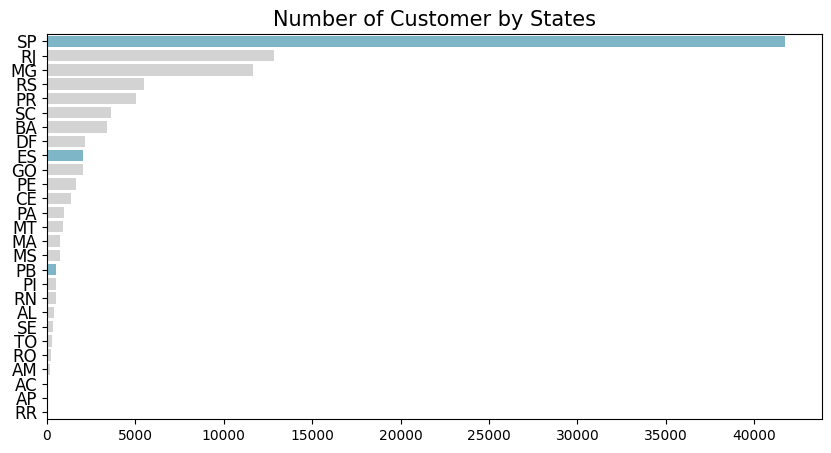

In [159]:
bystate_df = customers_dataset.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_unique_id"
}, inplace=True)
bystate_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_unique_id", 
    y="customer_state",
    data=bystate_df.sort_values(by="customer_unique_id", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

#### Pertanyaan 2: 
- Jenis pembayaran apa yang banyak digunakan saat pembayaran ?

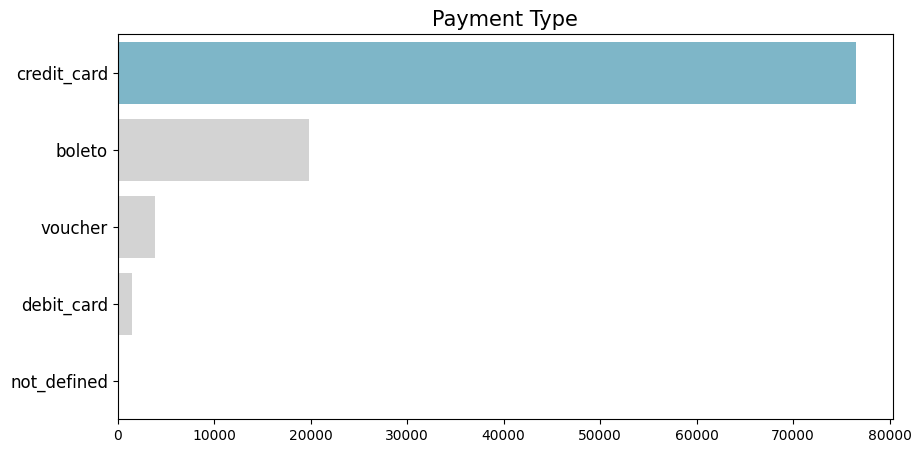

In [160]:
bystate_df = order_payments_dataset.groupby(by="payment_type").order_id.nunique().reset_index()
bystate_df.rename(columns={
    "order_id": "payment_sequential"
}, inplace=True)
bystate_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="payment_sequential", 
    y="payment_type",
    data=bystate_df.sort_values(by="payment_sequential", ascending=False),
    palette=colors_
)
plt.title("Payment Type", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

#### Conclusion

##### Pertanyaan 1
- Bagaimana demografi pelanggan dalam penjualan ?
- Demografi pelanggan dalam penjualan menggunakan number of customers by states yaitu dilihat dari states atau negara, dari diagram diatas dapat ditemukan data dengan total negara/wilayah sebanyak 27 negara yang berada dalam data, sedangkan negara/wilayah paling atas adalah Sao Paulo atau dalam singkatan SP dengan jumlah pelanggan terbanyak yaitu 41,746 pelanggan maka dalam diagram melewati batas 40000, negara/wilayah yang berada posisi kedua ditempati oleh Rio De Janeiro atau singkatan RJ dengan total 12,852 pelanggan, posisi ketiga Minas Gerais dengan total pelanggan 11,635 pelanggan, begitupun negara/wilayah dibawahnya.

#### Pertanyaan 2

- Jenis pembayaran apa yang banyak digunakan saat pembayaran ?
- Dalam tampilan diagram yang ada 5 jenis pembayaran yang ada, jenis pembayaran tertinggi terdapat pada metode pembayaran Kartu kredit dengan total 76,505 transaksi, urutan kedua adalah metode pembayaran boleto dengan total transaksi 19,784, urutan ketiga metode pembayaran menggunakan voucer dengan total transaksi 3,866, urutan keeempat adalah kartu debit dengan total transaksi 1,528 dan yang terakhir adalah metode pembayaran tidak didefinisikan dengan 3 transaksi sehingga pada diagram seperti tidak ada transaksi karena ukurannya ribuan. 